<a href="https://colab.research.google.com/github/JyotiSingh0996/Projects-of-data-science-by-Jyoti-Singh/blob/main/Data_Science_Salary_EDA%F0%9F%98%8A_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Scientist Salary Exploratory Data Analysis

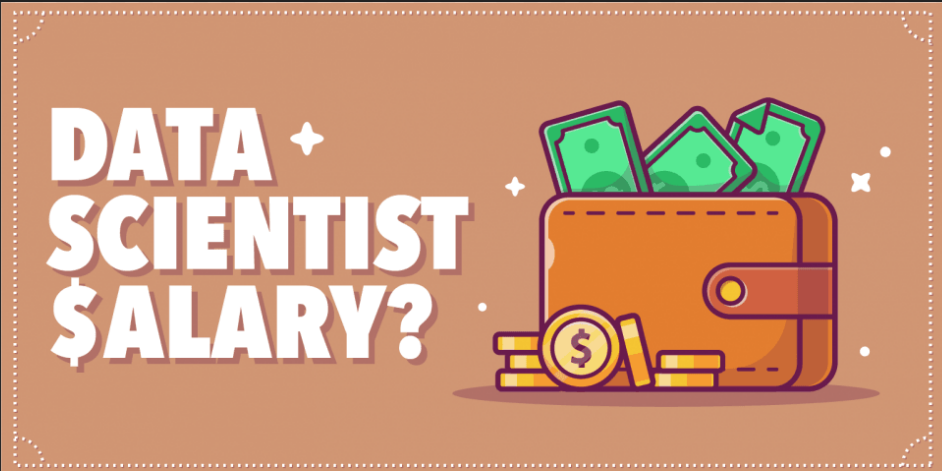

# Import Necessary Libraries

In [63]:
import numpy as np #linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt # data visualization
import seaborn as sns #statistical data visualization
import plotly.express as px

In [64]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [65]:
df = pd.read_csv('/content/drive/MyDrive/archive (7).zip')

In [66]:
# Dataset first look
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [67]:
# count rows and columns
df.shape

(3755, 11)

In [68]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

# Domain Knowledge
## Data Science Job Salaries Dataset contains 11 columns, each are:

#### work_year: The year the salary was paid.
#### experience_level: The experience level in the job during the year
#### employment_type: The type of employment for the role
#### job_title: The role worked in during the year.
#### salary: The total gross salary amount paid.
#### salary_currency: The currency of the salary paid as an ISO 4217 currency code.
#### salaryinusd: The salary in USD
#### employee_residence: Employee's primary country of residence in during the work year as an ISO 3166 country code.
#### remote_ratio: The overall amount of work done remotely
#### company_location: The country of the employer's main office or contracting branch
#### company_size: The median number of people that worked for the company during the year

In [69]:
# check datatype
df.dtypes

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

## Check duplicate values

In [70]:
# Check duplicate values
duplicate_values = df[df.duplicated()]
print("Number of Duplicate Values: ",duplicate_values.shape)

Number of Duplicate Values:  (1171, 11)


## Check Unique values in each columns

In [71]:
dict={}
for i in list(df.columns):
  dict[i] = df[i].unique().shape[0]

pd.DataFrame(dict,index=["unique Counts"]).T

,unique Counts
work_year,4
experience_level,4
employment_type,4
job_title,93
salary,815
salary_currency,20
salary_in_usd,1035
employee_residence,78
remote_ratio,3
company_location,72


## Rename the Values for better understanding

In [72]:
# Rename column values name for better understanding
df['experience_level'] = df['experience_level'].replace('MI','Mid-Level')
df['experience_level'] = df['experience_level'].replace('EN','Entry-Level')
df['experience_level'] = df['experience_level'].replace('SE','Senior-Level')
df['experience_level'] = df['experience_level'].replace('EX','Executive-Level')

# Rename experience_level column values
df['experience_level'] = df['experience_level'].replace('MI','Mid-Level')
df['experience_level'] = df['experience_level'].replace('EN','Entry-Level')
df['experience_level'] = df['experience_level'].replace('SE','Senior-Level')
df['experience_level'] = df['experience_level'].replace('EX','Executive-Level')

df['company_size'] = df['company_size'].replace('M','Medium')
df['company_size'] = df['company_size'].replace('L','Large')
df['company_size'] = df['company_size'].replace('S','Small')

## Distribution of Company Size

In [73]:
labels = ['Large','Small','Medium']
fig = px.pie(df['company_size'], values=df['company_size'].value_counts(),
             names=labels,
             color=labels,
             color_discrete_map={'Large':'Purple','Small':'Pink','Medium':'Yellow'},
             hole=0.4, width=550, height=440)
fig.show()

In [74]:
labels = ['Mid-Level','Senior-Level','Entry-Level','Executive-Level']
fig = px.pie(df['experience_level'], values=df['experience_level'].value_counts(),
             names=labels,
             color=labels,
             color_discrete_map={'Mid-Level':'Red','Senior-Level':'Black','Entry-Level':'Yellow','Executive-Level':'Blue'},
             hole=0.4, width=550, height=440)
fig.show()

## Top job in 2023

[Text(2, 0, '499'),
 Text(2, 0, '370'),
 Text(2, 0, '307'),
 Text(2, 0, '158'),
 Text(2, 0, '55'),
 Text(2, 0, '52'),
 Text(2, 0, '46'),
 Text(2, 0, '40'),
 Text(2, 0, '32'),
 Text(2, 0, '22'),
 Text(2, 0, '22'),
 Text(2, 0, '14')]

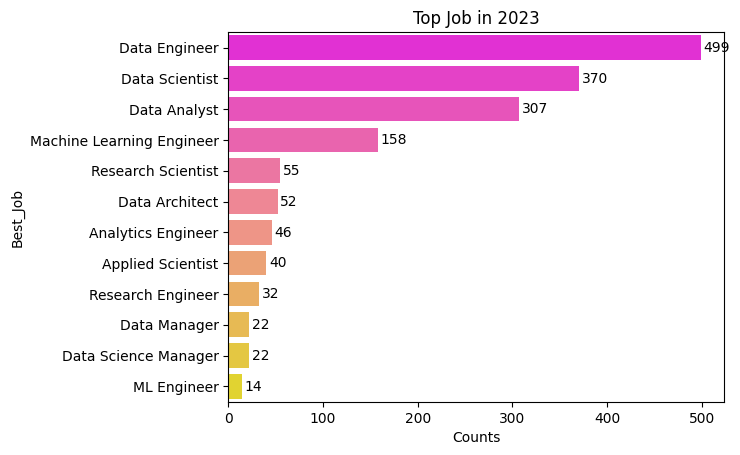

In [75]:
Best_jobs = df[df['work_year']==2023]['job_title'].value_counts().nlargest(12).reset_index()
fig, ax = plt.subplots()
ax = sns.barplot(ax = ax, data = Best_jobs , y = Best_jobs['index'], x = Best_jobs.job_title,palette = 'spring')
ax.set(ylabel='Best_Job',xlabel='Counts', title='Top Job in 2023')
ax.bar_label(ax.containers[0], padding = 2)

## Convert Company Location in country name

In [76]:
!pip install country_converter

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [77]:
import country_converter as coco

In [88]:
country_name = coco.convert(names=df['company_location'], to ='name_short')
df['company_location'] = country_name
country_locations = coco.convert(names=df['employee_residence'], to='name_short')
df['employee_residence'] = country_locations

In [93]:
df.drop(columns=['country_location'],inplace=True)

In [79]:
def bar_plot_h(axes, x, y, x_label, y_label, palette, data):
    sns.barplot(x=x, y=y, palette=palette, data=data, ax=axes)
    sns.despine(top=True, bottom=True, right=True)
    axes.set_xlabel(x_label)
    axes.set_ylabel(y_label)
    axes.set_xticks([])
    for i,j in enumerate(data.values):
        axes.text(j+2,i, str(f"${round(j[0],3)}"))

## Highest Income job in Dataset

In [80]:
job_title_wise_salary  = df.groupby('job_title').agg({'salary':'mean'}).sort_values('salary', ascending=False)
High_income_job = job_title_wise_salary [:10]
High_income_job

,salary
job_title,
Head of Machine Learning,6.000000e+06
Principal Data Architect,3.000000e+06
Lead Machine Learning Engineer,2.548667e+06
Lead Data Scientist,9.284853e+05
Data Analytics Lead,9.225000e+05
BI Data Analyst,8.366448e+05
Head of Data Science,7.037294e+05
Lead Data Analyst,6.550000e+05
ML Engineer,6.099979e+05


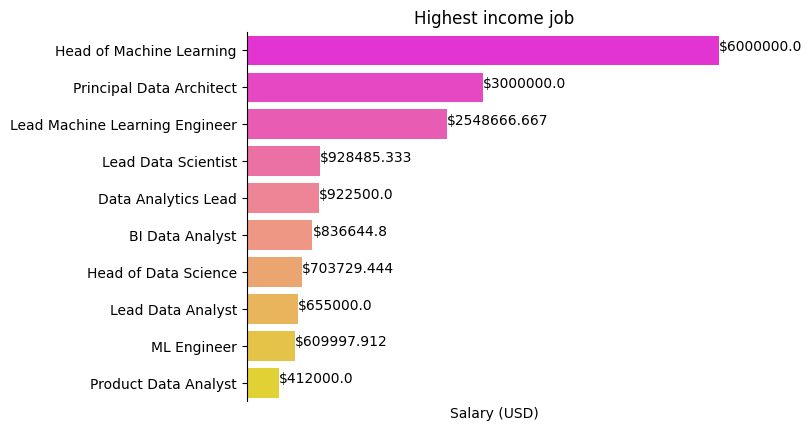

In [81]:
fig, ax3 = plt.subplots()
bar_plot_h(ax3, 'salary', High_income_job.index, 'Salary (USD)','', data = High_income_job,palette = 'spring')
ax3.set_title('Highest income job')
plt.show()

#Countries that paid the Highest Salaries in 2023

In [89]:
country_wise_salary = df.groupby('employee_residence').agg({'salary_in_usd':'mean'}).sort_values('salary_in_usd', ascending=False)
country_wise_salary_2023 = country_wise_salary[:10]
country_wise_salary_2023

,salary_in_usd
employee_residence,
Israel,423834.000000
Malaysia,200000.000000
Puerto Rico,166000.000000
United States,152822.011651
Canada,132222.905882
China,125404.000000
New Zealand,125000.000000
Bosnia and Herzegovina,120000.000000
Ireland,114943.428571


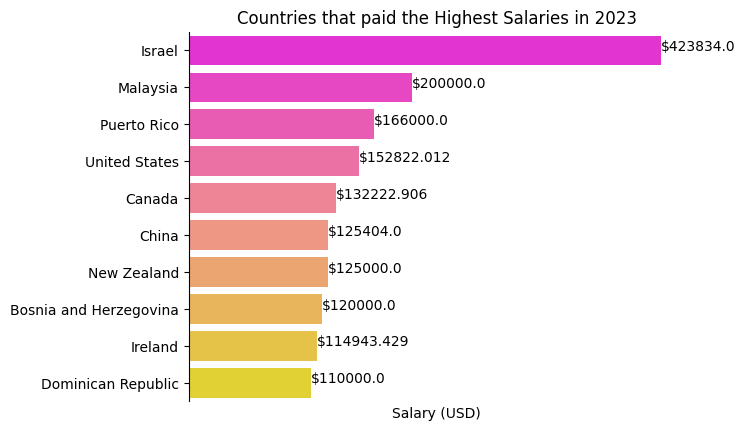

In [90]:

fig, ax3 = plt.subplots()
bar_plot_h(ax3, 'salary_in_usd', country_wise_salary_2023.index, 'Salary (USD)','', data = country_wise_salary_2023,palette = 'spring')
ax3.set_title('Countries that paid the Highest Salaries in 2023')
plt.show()

# Average Salaries in dollar per year according to employment_type

[Text(0, 2, '149367'),
 Text(0, 2, '27750'),
 Text(0, 2, '50000'),
 Text(0, 2, '17779')]

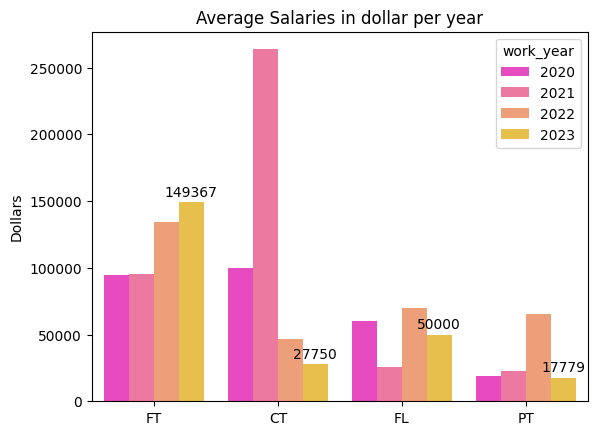

In [84]:
average_salaries = df.groupby('employment_type')['salary_in_usd'].mean().round().sort_values(ascending = False).reset_index()
fig, ax = plt.subplots()
sns.color_palette("husl", 9)
sns.barplot(ax=ax, data=df, x='employment_type', y = 'salary_in_usd', errorbar = None, hue='work_year', palette ='spring')

ax.set(xlabel='', ylabel='Dollars', title = 'Average Salaries in dollar per year')
sns.color_palette("husl", 9)
ax.bar_label(ax.containers[3], padding = 2)

#Average Salaries in dollar per year according to Experience Level

[Text(0, 2, '161986'),
 Text(0, 2, '156229'),
 Text(0, 2, '132547'),
 Text(0, 2, '202856')]

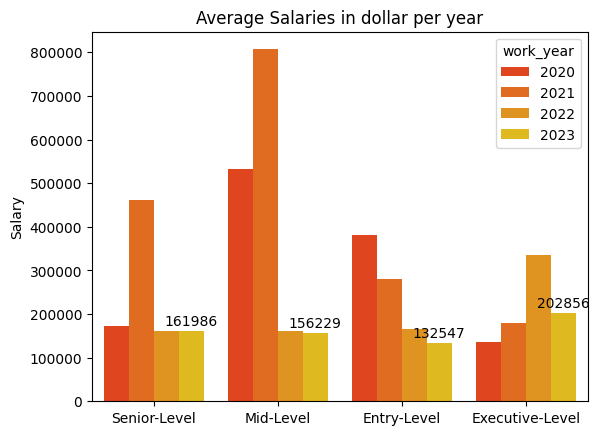

In [85]:
average_salaries = df.groupby('experience_level')['salary'].mean().round().sort_values(ascending = False).reset_index()
fig, ax = plt.subplots()

sns.barplot(ax=ax, data=df, x='experience_level', y = 'salary', errorbar = None, hue='work_year', palette ='autumn')

ax.set(xlabel='', ylabel='Salary', title = 'Average Salaries in dollar per year')

ax.bar_label(ax.containers[3], padding = 2)

In [86]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,country_location
0,2023,Senior-Level,FT,Principal Data Scientist,80000,EUR,85847,ES,100,Spain,Large,Spain
1,2023,Mid-Level,CT,ML Engineer,30000,USD,30000,US,100,United States,Small,United States
2,2023,Mid-Level,CT,ML Engineer,25500,USD,25500,US,100,United States,Small,United States
3,2023,Senior-Level,FT,Data Scientist,175000,USD,175000,CA,100,Canada,Medium,Canada
4,2023,Senior-Level,FT,Data Scientist,120000,USD,120000,CA,100,Canada,Medium,Canada


#Which country generate the highest wages
####(salary_in_usd)

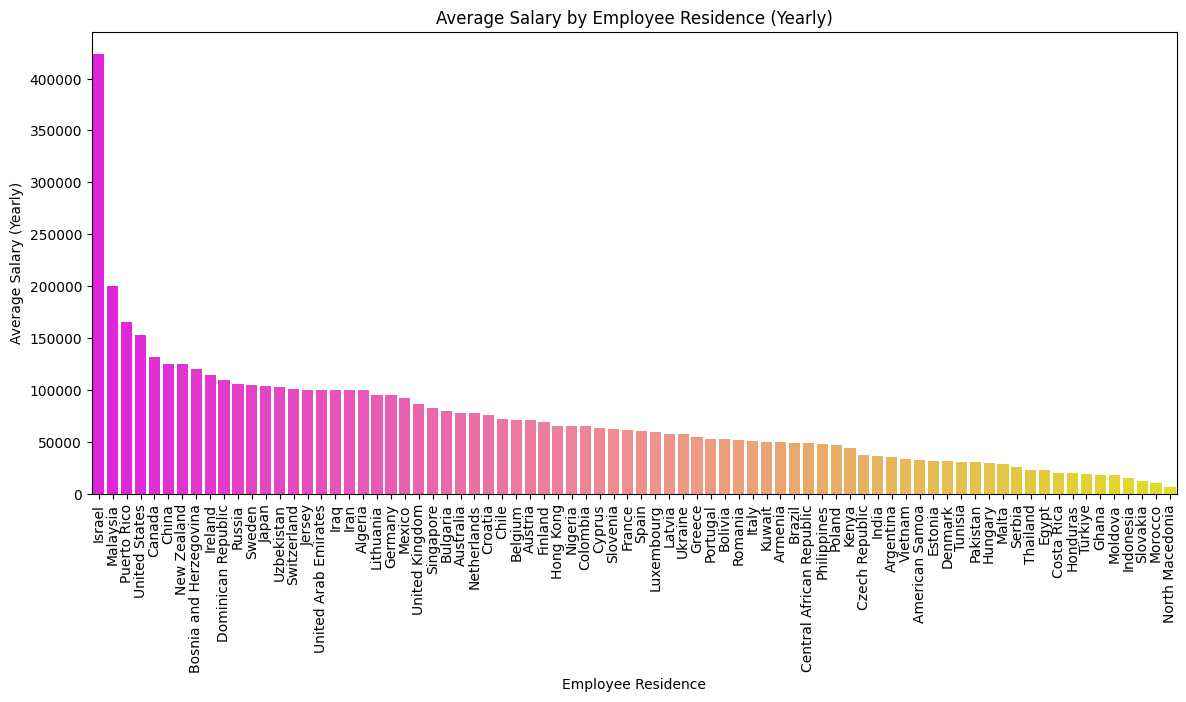

In [87]:
avg_salary_by_residence = df.groupby('country_location', as_index=False)['salary_in_usd'].mean()

fig2 = px.choropleth(avg_salary_by_residence,
                     locations='country_location',
                     locationmode='country names',
                     color='salary_in_usd',
                     hover_name='country_location',
                     color_continuous_scale=px.colors.sequential.Plasma,
                     title='Average Salary by Employee Residence',
                     labels={'salary_in_usd': 'Average salary_in_usd'},
                     projection='natural earth')
fig2.show()


# Average salary by employee_residence
avg_salary_by_residence = df.groupby('country_location')['salary_in_usd'].mean().sort_values(ascending=False)
plt.figure(figsize=(14, 6))
sns.barplot(x=avg_salary_by_residence.index, y=avg_salary_by_residence.values, palette = 'spring')
plt.title('Average Salary by Employee Residence (Yearly)')
plt.xlabel('Employee Residence')
plt.ylabel('Average Salary (Yearly)')
plt.xticks(rotation=90)
plt.show()


In [94]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

 # Average salary by location of the organization 
 #### (Salary)

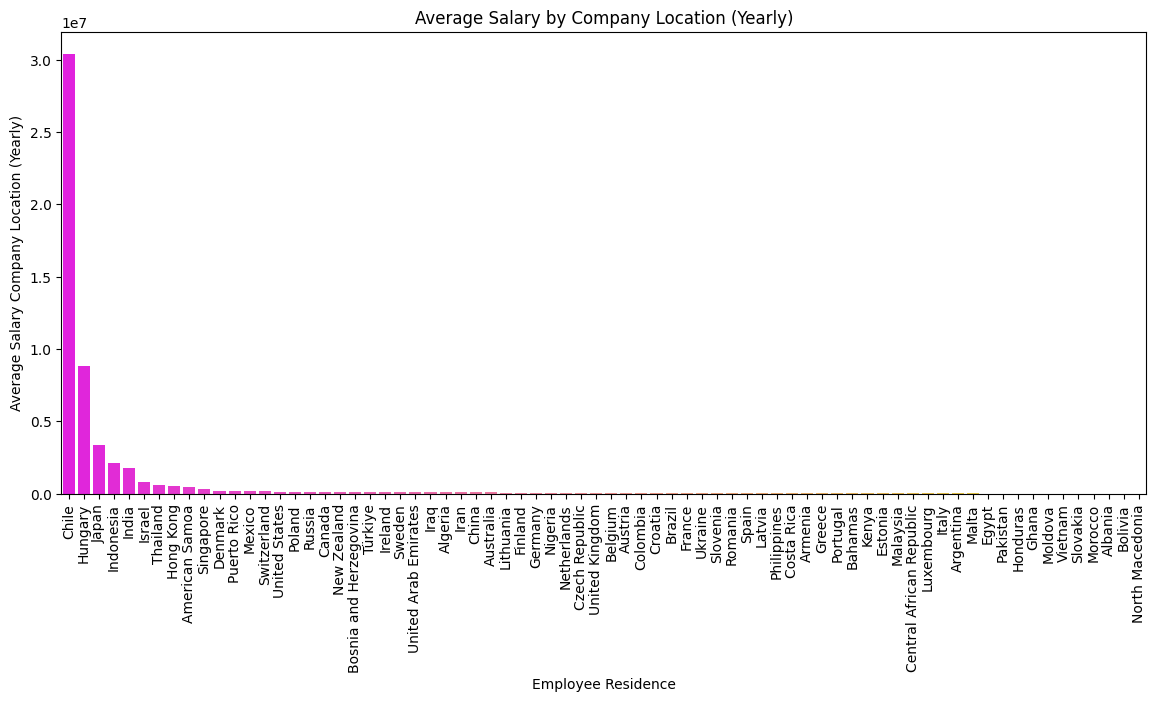

In [95]:
avg_salary_by_residence = df.groupby('company_location', as_index=False)['salary'].mean()

fig2 = px.choropleth(avg_salary_by_residence,
                     locations='company_location',
                     locationmode='country names',
                     color='salary',
                     hover_name='company_location',
                     color_continuous_scale=px.colors.sequential.Plasma,
                     title='Average Salary by Company Location (Yearly)',
                     labels={'salary_in_usd': 'Average salary_in_usd'},
                     projection='natural earth')
fig2.show()


# Average salary by employee_residence
avg_salary_by_residence = df.groupby('company_location')['salary'].mean().sort_values(ascending=False)
plt.figure(figsize=(14, 6))
sns.barplot(x=avg_salary_by_residence.index, y=avg_salary_by_residence.values, palette = 'spring')
plt.title('Average Salary by Company Location (Yearly)')
plt.xlabel('Employee Residence')
plt.ylabel('Average Salary Company Location (Yearly)')
plt.xticks(rotation=90)
plt.show()


<ipython-input-104-569f53906931>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



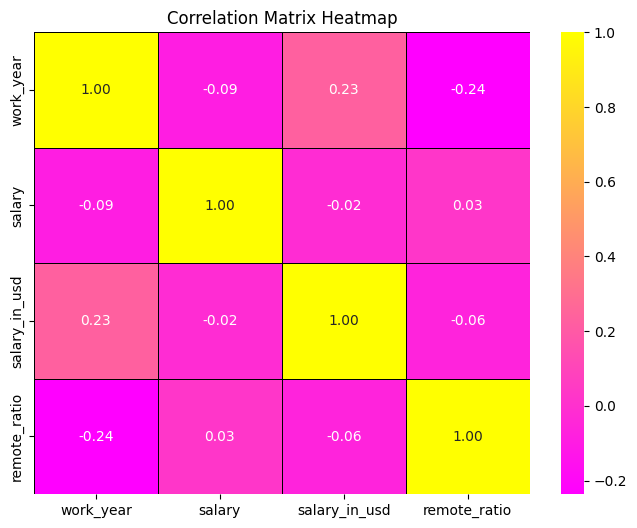

In [104]:
correlation_matrix = df.corr()

#Graph I.
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='spring', linewidths=0.5, fmt='.2f',linecolor="Black")
plt.title("Correlation Matrix Heatmap")
plt.show()

# Thankyou
#Hope you liked it